In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import torch
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import numpy as np

from tqdm.auto import tqdm

from functions import F, mu, g
from models import OneHiddenNN, TwoHiddenNN
import utils

/raid/home/hougo/working_directory/CS-TDL/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Illustration de la fonction $g$ qui permet d'obtenir une composition de fonction de Barron qui n'est pas Barron (constante de Barron qui croit exponentielement en la dimension $n$) avec :

\begin{equation}
g(x) =
\begin{cases}
C_m\,4^{m+1}\,x^{m+1}(1-x)^{m+1}, & x \in [0,1], \\
0, & \text{sinon},
\end{cases}
\end{equation}

On définit ensuite :
\begin{equation}
f_1(x) = \frac{1}{\varepsilon} g \left( \frac{x - K_1}{\varepsilon} \right),
\end{equation}

Pour obtenir la fonction qui nous intéresse :

\begin{equation}
f(x) = f_1(\|x\|)
\end{equation}

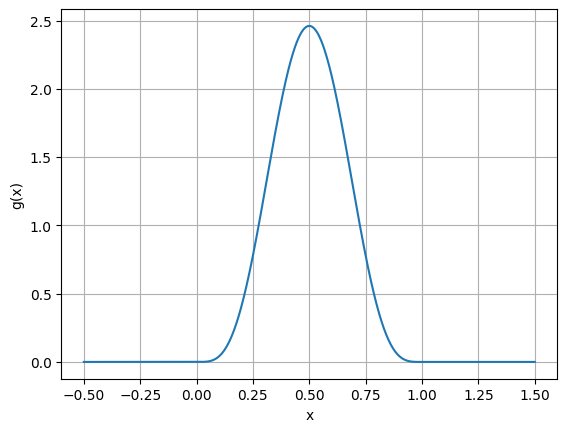

In [2]:
m = 4

x = torch.linspace(-0.5, 1.5, 1000)
y = g(x, 3)
plt.plot(x, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('g(x)')
plt.show()

On compare les réseaux à une et deux couches pour un nombre de paramètre équivalent :

/raid/home/hougo/working_directory/CS-TDL/venv/lib/python3.10/site-packages/torch/cuda/__init__.py:184: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return torch._C._cuda_getDeviceCount() > 0
100%|██████████| 50/50 [00:07<00:00,  6.27it/s]


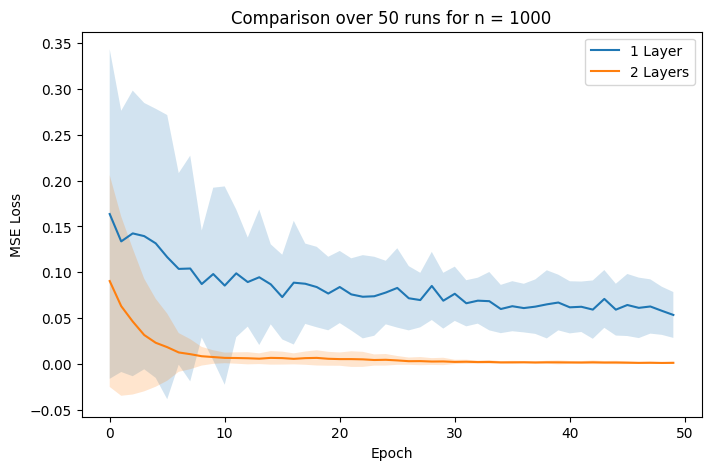

In [3]:
n = 1000 # dimension
m = 4

C1  = 1
C2 = 1
C3 = 10 # We need C3 > C1

K1 = C1 * n**(1/2)
eps = 1/(C3 * n**(1/2))
f = F(eps, K1, m)

epochs = 50
batch_size = 10

params_count = 2**16
runs = 50
lr = 1e-3

stats = utils.compare_models(OneHiddenNN, TwoHiddenNN, f, mu, n, params_count, epochs, batch_size, lr, runs)
utils.plot_stats(stats)

Pour une dimension donnée on calcule la loss des deux architectures en fonction du nombre de paramètres :

100%|██████████| 13/13 [00:12<00:00,  1.08it/s]


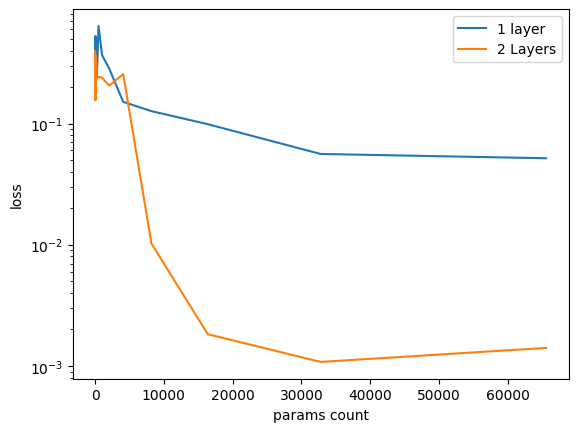

In [4]:
n = 1000
m = 4

C1  = 1
C2 = 1
C3 = 10

K1 = C1 * n**(1/2)
eps = 1/(C3 * n**(1/2))
f = F(eps, K1, m)

epochs = 50
batch_size = 10

log_params_count = 16
runs = 10
lr = 1e-3

x, y1, y2 = utils.parameter_analysis(OneHiddenNN, TwoHiddenNN, f, mu, n, log_params_count, epochs, batch_size, lr, runs)

plt.plot(x, y1, label="1 layer")
plt.plot(x, y2, label="2 Layers")
plt.yscale('log')
plt.xlabel("params count")
plt.ylabel("loss")
plt.legend()
plt.show()

On effectue un sweep des différentes combinaisons de dimensions et de nombres de paramètres afin de comparer finement les deux architectures :

In [ ]:
log_dim = 16
m = 4

C1  = 1
C2 = 1
C3 = 10

K1 = C1 * n**(1/2)
eps = 1/(C3 * n**(1/2))
f = F(eps, K1, m)

epochs = 50
batch_size = 10

log_params_count = 18
runs = 10
lr = 1e-3

x, y1, y2 = utils.join_analysis(OneHiddenNN, TwoHiddenNN, f, mu, log_dim, log_params_count, epochs, batch_size, lr, runs)

 73%|███████▎  | 8/11 [02:23<01:01, 20.66s/it]

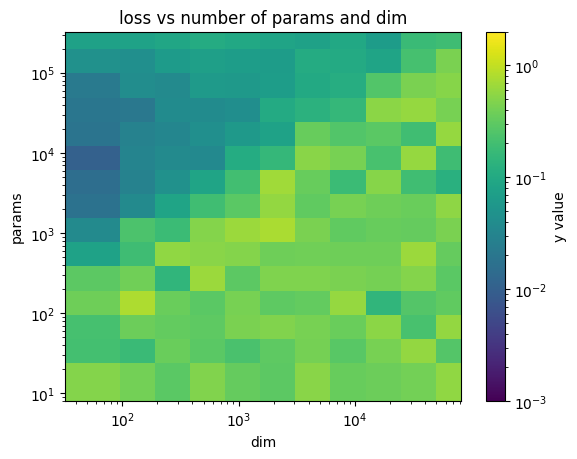

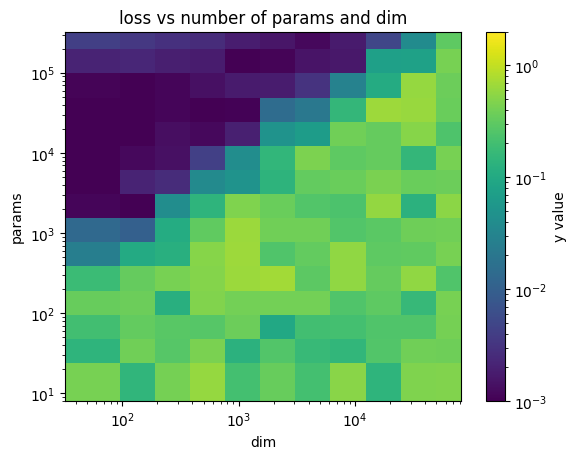

In [ ]:
def plot_loss_matrix(x, y, layer):
    X = x[:, :, 0]
    Y = x[:, :, 1]

    plt.figure()
    pcm = plt.pcolormesh(X, Y, y, shading="auto")
    pcm = plt.pcolormesh(
        X, Y, y,
        shading="auto",
        norm=colors.LogNorm(vmin=1e-3, vmax=2)
    )
    plt.colorbar(pcm, label="y value")
    plt.xlabel("dim")
    plt.ylabel("params")
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f"loss vs number of params and dim with {layer} layer(s) network")
    plt.show()

plot_loss_matrix(x, y1, 1)
plot_loss_matrix(x, y2, 2)
